In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import dataset as dd # custom dataset class
import unet
from unet import UNet, shortcuts

%load_ext autoreload # so that when you change an imported file, it changes in the notebook
%autoreload 2
%matplotlib inline

# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

# Load the raw CIFAR-10 data.
im_ref, im_us = dd.get_dataset(1)
X_train, y_train = (im_us,  im_ref)
X_test, y_test = (X_train, y_train)



In [2]:
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

('Training data shape: ', (320, 320, 256, 8))
('Training labels shape: ', (320, 320, 256, 1))
('Test data shape: ', (320, 320, 256, 8))
('Test labels shape: ', (320, 320, 256, 1))


In [3]:
# Define layers
C1 = shortcuts.conv(filters=16, kernel_size=(3, 3), padding='same', strides=(1,1), activation='relu')
M1 = shortcuts.maxpool(pool_size=(2, 2), strides=(2, 2), padding='same')
C2 = shortcuts.conv(filters=32, kernel_size=(3, 3), padding='same', strides=(1,1), activation='relu')

# "un" versions are my name for the upsampling path
# "unconv" automatically concatenates the output from the corresponding
# layer in the contracting network
C3 = shortcuts.unconv(filters=32, kernel_size=(3, 3), padding='same', strides=(1, 1), activation='relu')
U1 = shortcuts.unmaxpool(size=(2, 2))
C4 = shortcuts.unconv(filters=16, kernel_size=(3, 3), padding='same', strides=(1,1), activation='relu')
D1 = shortcuts.fc(1)

input_shape = X_train.shape[1:]
U = UNet(input_shape, C1, M1, C2, C3, U1, C4, D1)

In [4]:
U.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 320, 256, 8)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 320, 256, 16)      1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 160, 128, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 160, 128, 32)      4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 160, 128, 32)      9248      
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 320, 256, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 320, 256, 16)      4624      
__________

In [5]:
history = U.train(X_train, y_train)

Epoch 1/1
320/320 [==============================] - 11s 35ms/step - loss: 8.8480e-04 - mean_squared_error: 8.8480e-04


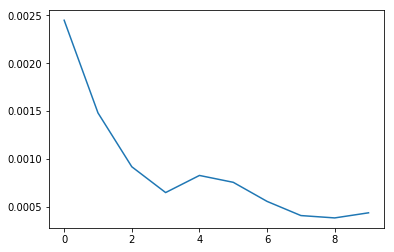

In [6]:
plt.plot(history.losses)
plt.show()

In [9]:
pred = U.predict(X_train)

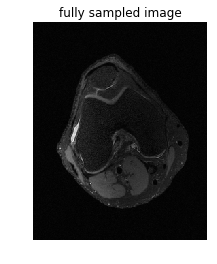

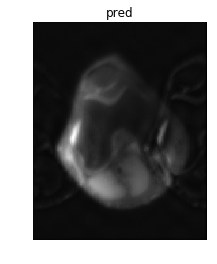

In [10]:
slice_to_show = 160

plt.imshow(im_ref[slice_to_show, :, :, 0], cmap='gray')
plt.title('fully sampled image')
plt.axis('off')
plt.show()

plt.imshow(pred[slice_to_show, :, :, 0], cmap='gray')
plt.title('pred')
plt.axis('off')
plt.show()
